<a href="https://colab.research.google.com/github/elljali/Pembelajaran-Mesin/blob/master/UTS_1197050121_Rizal_Setiawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Pembelajaran Mesin

Nim, Nama, Kelas : Rizal Setiawan, 1197050121, D

# Topik Mini Riset

Klasifikasi Data Lulus Telat Waktu

# Business Understanding 

Tidak terdatanya mahasiswa yang lulus tepat waktu menyebabkan tidak terdatanya mahasiswa yang lulus tepat waktu dan yang lulus terlambat. Projects kali ini adalah pengklasifikasian data mahasiswa yang lulus telat waktu

# Data Preparation



In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
url = 'https://github.com/elljali/Pembelajaran-Mesin/raw/master/data_lulus_tepat_waktu.csv'
dataset=  pd.read_csv(url, sep=',')

df.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [42]:
dataset.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [43]:
dataset.shape

(1687, 5)

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   object 
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


In [45]:
dataset.isnull().values.any()

False

# Modeling

Membahas mengenai proses Fiting Model, set parameter-parameter dll.

In [46]:
ket = {"Ya" : 0, "Tidak" : 1}
dataset["tepat"] = dataset["tepat"].map(ket)

In [47]:
dataset['tepat'].value_counts()

0    1552
1     135
Name: tepat, dtype: int64

In [48]:
print('Ya', round(dataset['tepat'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Tidak', round(dataset['tepat'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Ya 92.0 % of the dataset
Tidak 8.0 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: YA || 1: Tidak)')

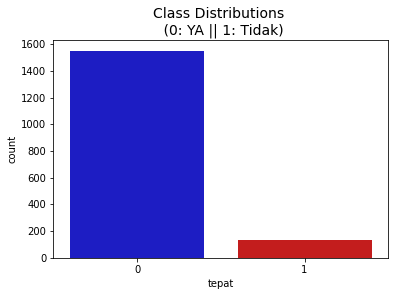

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot('tepat', data=dataset, palette=colors)
plt.title('Class Distributions \n (0: YA || 1: Tidak)', fontsize=14)

**Dataset belum balance terliat perbedaan diagram 0 dan 1**
kita Resampling datanya. Resampling ada 2 :
*   Random Oversampling: Randomly duplicate examples in the minority class.
*   Random Undersampling: Randomly delete examples in the majority class.

disini kita menggunakan random over sampling

Referensi Resampling : [Resampling dataset](https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook)

In [53]:
# Class count
count_class_0, count_class_1 = dataset.tepat.value_counts()

# Divide by class
df_class_0 = dataset[dataset['tepat'] == 0]
df_class_1 = dataset[dataset['tepat'] == 1]

Random over-sampling:
0    1552
1    1552
Name: tepat, dtype: int64


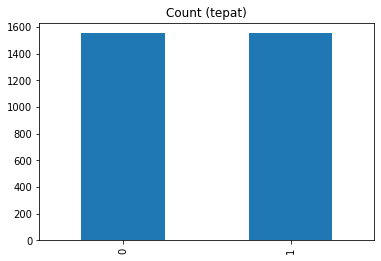

In [54]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.tepat.value_counts())

df_test_over.tepat.value_counts().plot(kind='bar', title='Count (tepat)');

In [55]:
df_test_over.tepat.value_counts()

0    1552
1    1552
Name: tepat, dtype: int64

**nah sekarang dataset diagram 0 dan 1 sudah balance**

In [56]:
x = df_test_over.iloc[:, :-1].values
y = df_test_over.iloc[:, -1].values

In [57]:
from sklearn.model_selection import train_test_split

validation_size = 0.20
num_trees = 100
seed = 5
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=validation_size, random_state=seed)

# Evaluasi

Membahas mengenai hasil pengujian terhadap model.

In [58]:
rf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9790660225442834
[[296  13]
 [  0 312]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       309
           1       0.96      1.00      0.98       312

    accuracy                           0.98       621
   macro avg       0.98      0.98      0.98       621
weighted avg       0.98      0.98      0.98       621



In [59]:
# ip1 = 3.17
# ip2 = 3.02
# ip3 = 3.28
# ip4 = 2.96

prediction_rf=rf.predict([[3.17,3.02,3.28,2.96]])
score1 = rf.score(x_test, y_test)
if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)
print("Test score: {0:.2f} %".format(100 * score1)) 

Prediksi : Tidak Tepat Waktu
Test score: 97.91 %


In [60]:
prediction_rf=rf.predict([[3.07,3.04,3.39,3.55]])
score1 = rf.score(x_test, y_test)
if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)
print("Test score: {0:.2f} %".format(100 * score1)) 

Prediksi : Tepat Waktu
Test score: 97.91 %
